In [4]:
import numpy as np
import pandas as pd

# Import dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using our familiar wine dataset: 

In [5]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
df.shape

(178, 14)

Removing the target variable (wine type): 

In [7]:
wine = df.drop('target', axis =1)

Scaling the predictors:

In [8]:
wine_scaled = preprocessing.scale(wine)

Building the model:

In [9]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(wine_scaled)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)
pca_df["target"] = df["target"]

Our matrix of principal components:

In [10]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,2


How well does each PC capture the variance in the data set?

Text(0, 0.5, 'Cumulative explained variance')

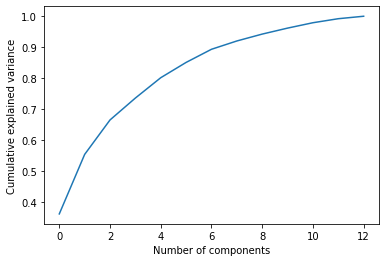

In [11]:
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [12]:
pca_85 = PCA(.85)
pca_85.fit_transform(wine_scaled)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

85.1 % of variance explained by 6 components.


In [13]:
pca.explained_variance_ratio_[:3]

array([0.36198848, 0.1920749 , 0.11123631])

Visualising our 13D data in 2D:

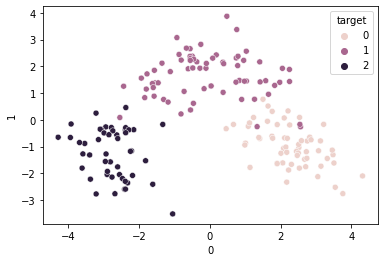

In [14]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
                     hue = 'target',
                     data=pca_df,
                     legend=True)
plt.show()

This is cool, but how do we know what is contributing to the spatial separation? Enter the biplot:

In [16]:
!#pip install pca

from pca import pca

X_new = pd.DataFrame(data=load_wine().data, columns=load_wine().feature_names, index=load_wine().target)

wine_scaled_2 = preprocessing.scale(X_new)

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f4351849ef429f5c9b9f58d1ae8a38b125ba43d3f5591b0ee39b7a95b6d9b6f7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [17]:
wine_scaled_2

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [85.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


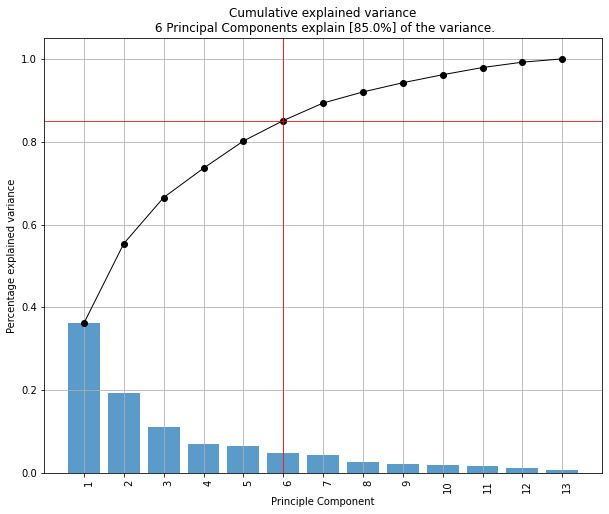

<Figure size 432x288 with 0 Axes>

In [18]:
# Initialize to reduce the data up to the number of componentes that explains 85% of the variance.
model = pca(n_components=0.85)

# Or reduce the data towards 2 PCs
#model = pca(n_components=2)

# Fit transform
results = model.fit_transform(wine_scaled_2)

# Plot explained variance
fig, ax = model.plot()



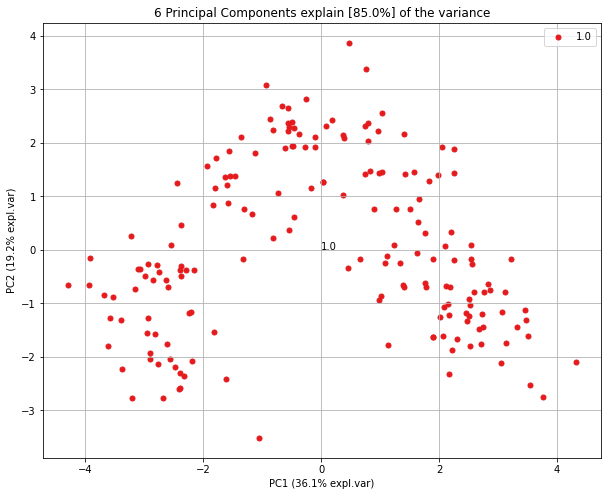

In [19]:
# Scatter first 2 PCs
fig, ax = model.scatter()



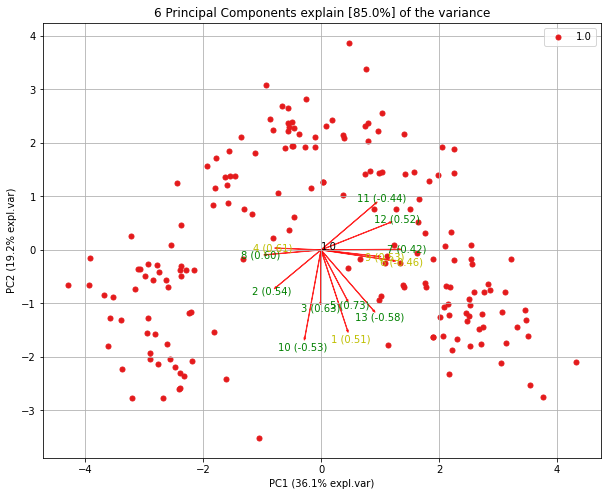

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fefe09e43d0>)

In [20]:
model.biplot()

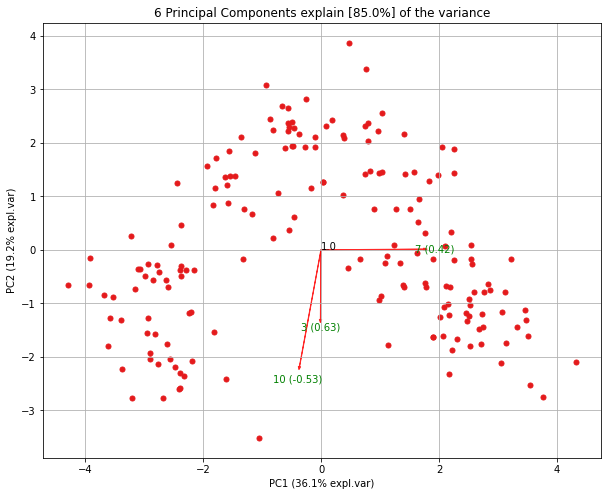

In [21]:
# Make biplot with the number of features
fig, ax = model.biplot(n_feat=3, legend=False)